<a href="https://colab.research.google.com/github/ImPrigoryunil/IT-2Lab/blob/main/%D0%9B%D0%A0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1. Предсказание свойств химических веществ

Для выполнения задания я возьму набор данных bace.csv с сайта MoleculeNet. Этот набор содержит информацию о соединениях и их активности в отношении ингибирования β-секретазы 1 (BACE-1), что важно для исследований болезни Альцгеймера.

In [4]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 35.7 MB/s eta 0:00:00


In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Загрузка данных
df = pd.read_csv('bace.csv')

# Добавление молекулярных дескрипторов
def add_molecular_descriptors(df, smiles_col='mol'):
    df['ROMol'] = df[smiles_col].apply(lambda x: Chem.MolFromSmiles(x))
    df['LogP'] = df['ROMol'].apply(lambda x: Descriptors.MolLogP(x))
    df['MolWt'] = df['ROMol'].apply(lambda x: Descriptors.MolWt(x))
    df['NumHDonors'] = df['ROMol'].apply(lambda x: Descriptors.NumHDonors(x))
    df['NumHAcceptors'] = df['ROMol'].apply(lambda x: Descriptors.NumHAcceptors(x))
    return df

df = add_molecular_descriptors(df)

# Выбор признаков и целевой переменной
X = df[['LogP', 'MolWt', 'NumHDonors', 'NumHAcceptors']]
y = df['pIC50']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=100)
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2 Score: 0.3938205302385588
MSE: 1.1750689166271042


Набор данных bace.csv содержит SMILES-строки и значения pIC50 (мера активности соединений)

Модель RandomForestRegressor предсказывает pIC50 на основе молекулярных дескрипторов (LogP, молекулярный вес, количество доноров и акцепторов водорода)

Метрики R^2 и MSE помогают оценить качество предсказаний

### Задание 2. Кластеризация химических веществ

Для кластеризации можно использовать методы, такие как k-means или hierarchical clustering, на основе молекулярных дескрипторов или фингерпринтов

[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerator
[11:11:52] DEPRECATION WARNING: please use MorganGenerat

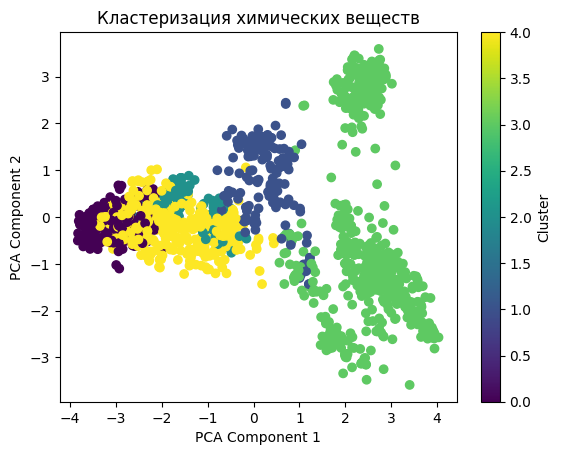


Cluster 0:
             LogP       MolWt  NumHDonors  NumHAcceptors
count  245.000000  245.000000  245.000000     245.000000
mean     3.095712  403.829894    1.126531       5.195918
std      0.838812   43.936436    0.333127       0.955133
min      0.907400  264.332000    1.000000       2.000000
25%      2.543820  378.382000    1.000000       5.000000
50%      3.101300  404.445000    1.000000       5.000000
75%      3.666300  433.369000    1.000000       6.000000
max      5.602500  499.468000    2.000000       7.000000

Cluster 1:
             LogP       MolWt  NumHDonors  NumHAcceptors
count  156.000000  156.000000  156.000000     156.000000
mean     2.677324  520.070212    3.006410       4.647436
std      1.033806   62.950324    0.791053       1.140484
min     -0.286800  351.242000    1.000000       2.000000
25%      2.100300  475.393000    3.000000       4.000000
50%      2.614560  515.618000    3.000000       5.000000
75%      3.187550  571.999000    3.250000       6.000000
max    

In [12]:
from rdkit.Chem import AllChem
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Генерация фингерпринтов (Morgan fingerprints)
df['Fingerprint'] = df['ROMol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, radius=2, nBits=1024))

# Преобразование фингерпринтов в матрицу
X = np.array([list(fp) for fp in df['Fingerprint']])

# Кластеризация k-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# Визуализация кластеров
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Кластеризация химических веществ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Интерпретация кластеров
for cluster in sorted(df['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster][['LogP', 'MolWt', 'NumHDonors', 'NumHAcceptors']].describe())

K-means кластеризует соединения на 5 кластеров.

PCA уменьшает размерность для визуализации.

Описательная статистика по кластерам (LogP, MolWt и т.д.) помогает понять их свойства:

Например, кластер с высоким LogP может содержать гидрофобные соединения.

Кластер с большим количеством доноров водорода может быть богат функциональными группами, такими как -OH или -NH2.